# An example of using EASYMORE with source netCDF files in regular Latitude and Longitude
## Remapping of ERA5 to subbasins of South Saskatchewan River at Medicine Hat, Alberta, Canada.

In [1]:
# loading EASYMORE
from easymore.easymore import easymore

# initializing EASYMORE object
esmr = easymore()

# specifying EASYMORE objects
# name of the case; the temporary, remapping and remapped file names include case name
esmr.case_name                = 'ERA5_Medicine_Hat'              
# temporary path that the EASYMORE generated GIS files and remapped file will be saved
esmr.temp_dir                 = '../temporary/'
# name of target shapefile that the source netcdf files should be remapped to
esmr.target_shp               = '../data/target_shapefiles/South_Saskatchewan_MedicineHat.shp'
# name of netCDF file(s); multiple files can be specified with *
esmr.source_nc                = '../data/Source_nc_ERA5/ERA5_NA_*.nc'
# name of variables from source netCDF file(s) to be remapped
esmr.var_names                = ['airtemp','pptrate']
# rename the variables from source netCDF file(s) in the remapped files;
# it will be the same as source if not provided
esmr.var_names_remapped       = ['temperature','precipitation']
# name of variable longitude in source netCDF files
esmr.var_lon                  = 'longitude'
# name of variable latitude in source netCDF files
esmr.var_lat                  = 'latitude'
# name of variable time in source netCDF file; should be always time
esmr.var_time                 = 'time'
# location where the remapped netCDF file will be saved
esmr.output_dir               = '../output/'
# format of the variables to be saved in remapped files,
# if one format provided it will be expanded to other variables
esmr.format_list              = ['f4']
# fill values of the variables to be saved in remapped files,
# if one value provided it will be expanded to other variables
esmr.fill_value_list          = ['-9999.00']
# if required that the remapped values to be saved as csv as well
esmr.save_csv                 = True
esmr.complevel                 =  9
# if uncommented EASYMORE will use this and skip GIS tasks
esmr.remap_csv                = '../temporary/ERA5_Medicine_Hat_remapping.csv'

# execute EASYMORE
esmr.nc_remapper()


EASYMORE version 0.0.5 is initiated.
no author name is provide and the author name is changed to (author name)!
EASYMORE is given multiple varibales to be remapped but only on format and fill valueEASYMORE repeat the format and fill value for all the variables in output files
remap file is provided; EASYMORE will use this file and skip calculation of remapping
EASYMORE will remap variable  airtemp  from source file to variable  temperature  in remapped NeCDF file
EASYMORE will remap variable  pptrate  from source file to variable  precipitation  in remapped NeCDF file
EASYMORE detects that the varibales from the netCDF files are identicalin dimensions of the varibales and latitude and longitude
EASYMORE detects that all the varibales have dimensions of:
['time', 'latitude', 'longitude']
EASYMORE detects that the longitude varibales has dimensions of:
['longitude']
EASYMORE detects that the latitude varibales has dimensions of:
['latitude']
EASYMORE case exists in the remap file
------R

--------------

# Visualization of the source and the results

/Users/shg096/opt/anaconda3/envs/myenv38/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  warnings.warn(


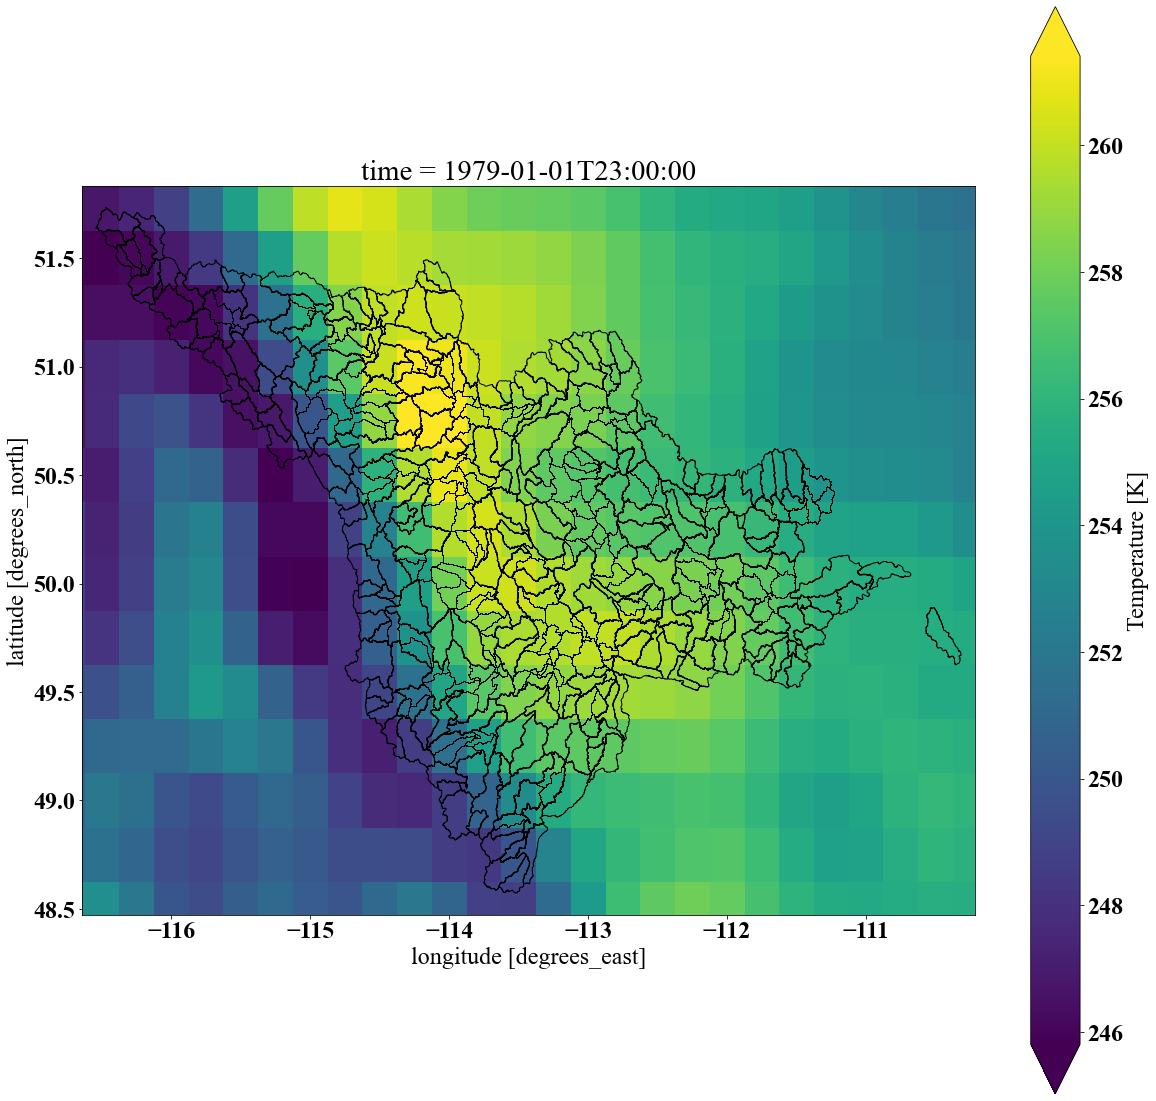

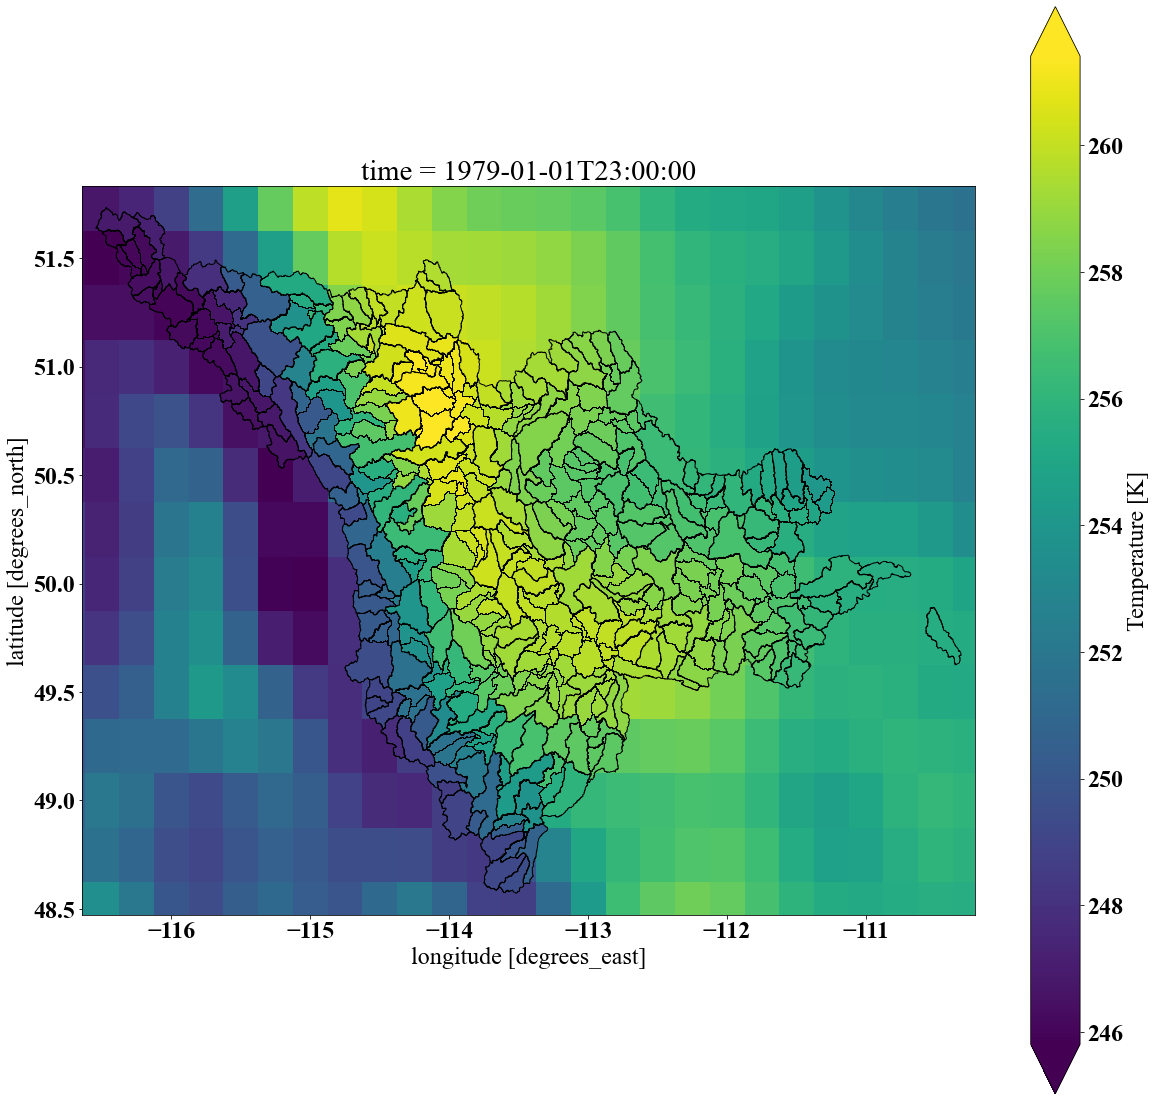

In [2]:
# load the packages
import xarray as xr
from matplotlib import pyplot as plt
import geopandas as gpd
import pandas as pd
import matplotlib
import os
import numpy as np
from datetime import datetime
import sys
font = {'family' : 'Times New Roman',
         'weight' : 'bold',
         'size'   : 24}
matplotlib.rc('font', **font)


# varibales to visualize
source_file_name                = '../data/Source_nc_ERA5/ERA5_NA_19790101.nc'
source_file_dimension_lon       = "longitude"
source_file_dimension_lat       = "latitude"
remapped_file_name              = '../output/ERA5_Medicine_Hat_remapped_1979-01-01-00-00-00.nc'
varibale_name_in_source_file    = 'airtemp'
varibale_name_in_remapped_file  = 'temperature'
variable_time_in_source_file    = 'time'
variable_time_in_remapped_file  = 'time'
shp_target_name                 = '../temporary/ERA5_Medicine_Hat_target_shapefile.shp'
shp_target_name                 = esmr.temp_dir+ esmr.case_name + '_target_shapefile.shp'
time_step_of_viz                = '1990-01-01 00:00:00' # it should be in form of 1990-02-01 00:00:00 
#shp_target = gpd.read_file(esmr.temp_dir+ esmr.case_name + '_target_shapefile.shp') # load the target shapefile
location_save_fig               = '../fig/'
cmap                            = 'viridis'
margin                          = 0.1 #degree
linewidth                       = 1
add_colorbar                    = True
target_shp_ID                   = 'ID_t'
remapped_var_id                 = 'ID'

# create the fig folder is not existed
if not os.path.isdir(location_save_fig):
    os.mkdir(location_save_fig)

# get the time step in the source netcdf file
ds_source = xr.open_dataset(source_file_name) # source
ds_remapped = xr.open_dataset(remapped_file_name) # the remap of above
# check if the times are identical in source and remapped
if not ds_source[variable_time_in_source_file].equals(ds_remapped[variable_time_in_remapped_file]):
    sys.exit('The source and remapped files seems to have different time; make sure '+\
             'the remapped files is from the same source file.')
# get the step for the remapped
date = pd.DatetimeIndex(ds_source[variable_time_in_source_file].dt.strftime('%Y-%m-%d %H:%M:%S'))
df = pd.DataFrame(np.arange(len(date)),
                  columns=["step"],
                  index=date)
df = df.iloc[df.index.get_loc(datetime.strptime(time_step_of_viz, '%Y-%m-%d %H:%M:%S'),method='nearest')]
step = df['step'].item()

# load the data and get the max and min values of remppaed file for the taarget variable
max_value = ds_remapped[varibale_name_in_remapped_file][step].max().item() # get the max of remapped
min_value = ds_remapped[varibale_name_in_remapped_file][step].min().item() # get the min of remapped


#
shp_target = gpd.read_file(shp_target_name) # load the target shapefile
min_lon, min_lat, max_lon, max_lat = shp_target.total_bounds


# first figure the source
fig, ax = plt.subplots(figsize=(20, 20))
ds_source[varibale_name_in_source_file][step].plot.pcolormesh(x=source_file_dimension_lon,
                                                              y=source_file_dimension_lat,
                                                              add_colorbar=add_colorbar,
                                                              ax = ax,
                                                              cmap=cmap,
                                                              vmin=min_value,
                                                              vmax=max_value)
shp_target.geometry.boundary.plot(color=None,edgecolor='k',linewidth = linewidth, ax = ax)
plt.ylim([min_lat-margin,max_lat+margin])
plt.xlim([min_lon-margin,max_lon+margin])
plt.savefig(location_save_fig+'test1.pdf')


# second figure remapped
fig, ax = plt.subplots(figsize=(20, 20))
ds_source[varibale_name_in_source_file][step].plot.pcolormesh(x=source_file_dimension_lon,
                                                              y=source_file_dimension_lat,
                                                              add_colorbar=add_colorbar,
                                                              ax = ax,
                                                              cmap=cmap,
                                                              vmin=min_value,
                                                              vmax=max_value)

# dataframe
df = pd.DataFrame()
df ['ID'] = ds_remapped[remapped_var_id][:]
df ['value'] = ds_remapped[varibale_name_in_remapped_file][step]
df = df.sort_values(by=['ID'])
df = df.reset_index(drop=True)

# shapefile
shp_target = shp_target[shp_target[target_shp_ID].isin(df[remapped_var_id])]
shp_target = shp_target.sort_values(by=[target_shp_ID])
shp_target = shp_target.reset_index(drop=True)

#
shp_target ['value'] = df ['value']
shp_target.plot(column= 'value',
                edgecolor='k',
                linewidth = linewidth,
                ax = ax,
                vmin=min_value,
                vmax=max_value)#, legend=True)
plt.ylim([min_lat-margin,max_lat+margin])
plt.xlim([min_lon-margin,max_lon+margin])
plt.savefig(location_save_fig+'test2.pdf')


EASYMORE version 0.0.5 is initiated.


/Users/shg096/opt/anaconda3/envs/myenv38/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  warnings.warn(


EASYMORE detects case 1 - regular lat/lon
max difference of lat values in source nc files are :  0.0
max difference of lon values in source nc files are :  0.0


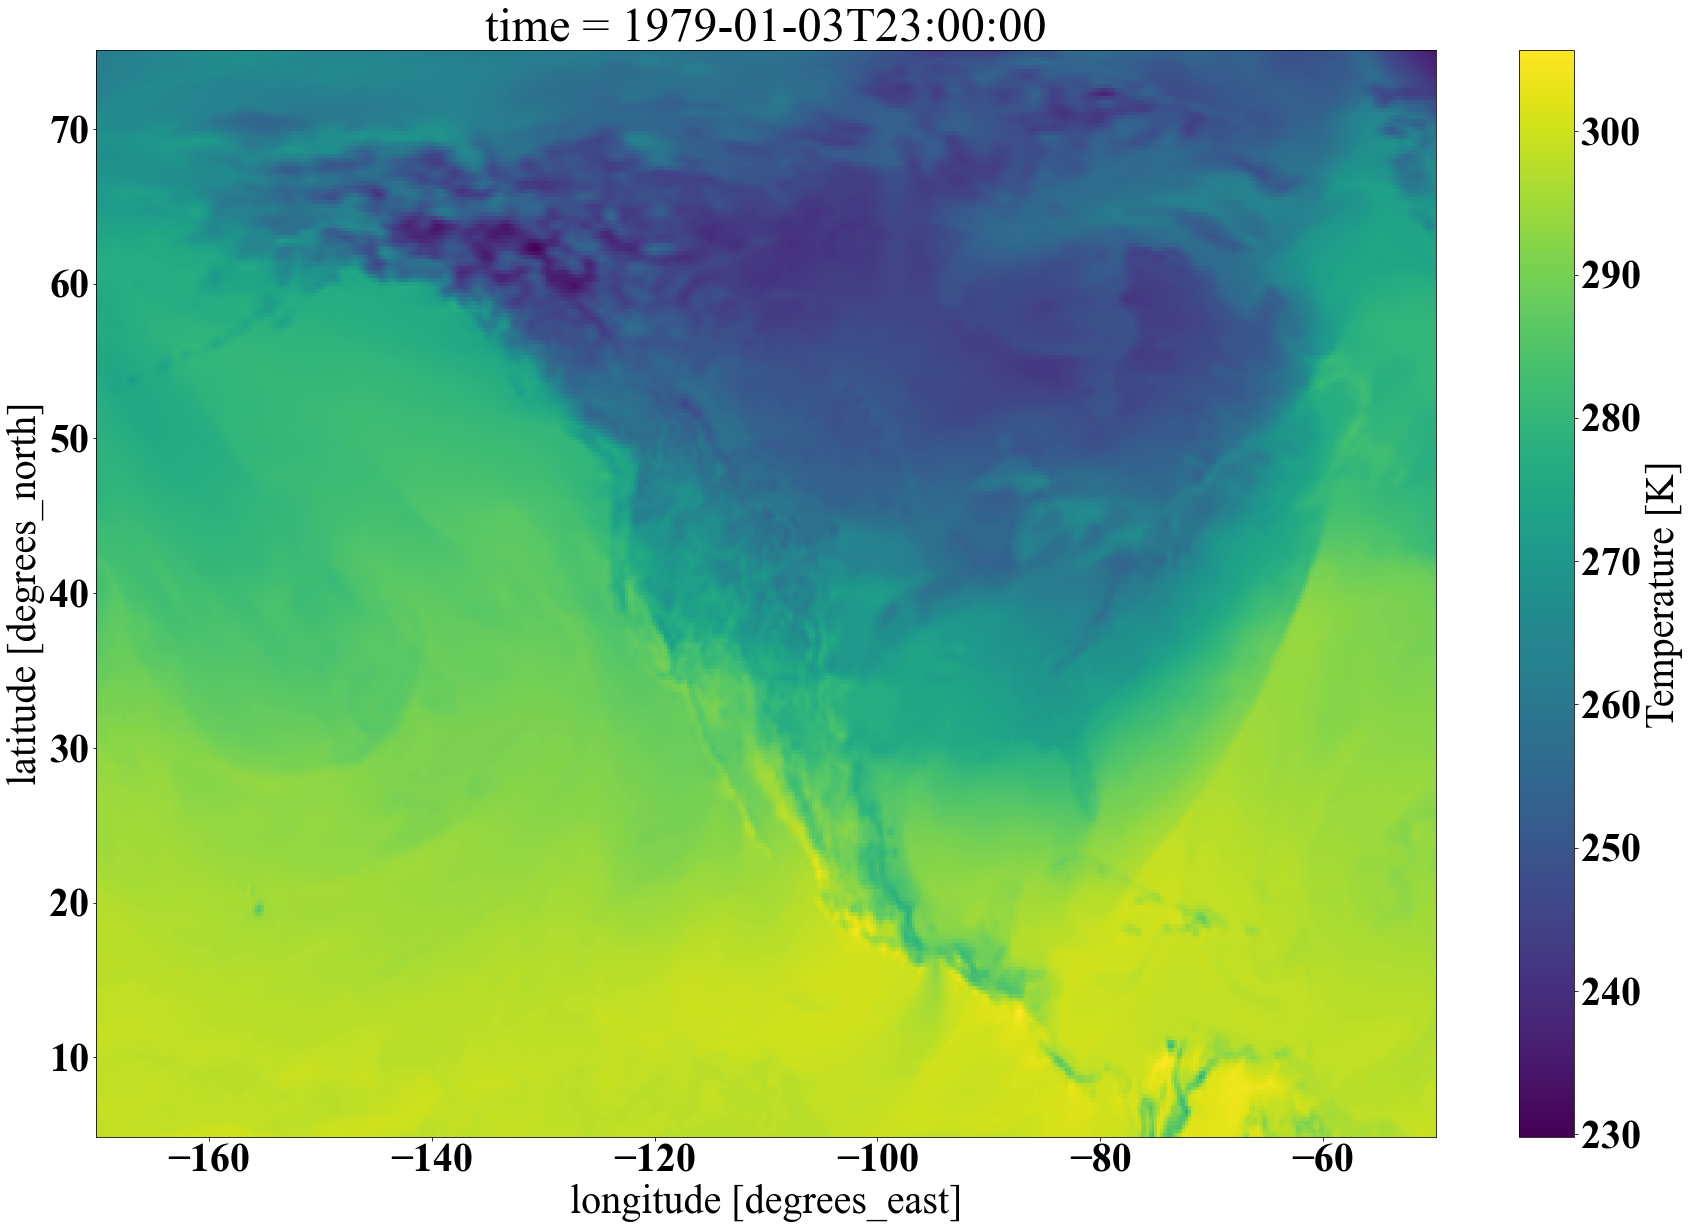

In [1]:
# loading EASYMORE
from easymore.easymore import easymore

# initializing EASYMORE object
esmr = easymore()

# set the paramaters
source_nc_name                  = '../data/Source_nc_ERA5/ERA5_NA_19790103.nc' # name of source nc file
source_nc_var_lon               = "longitude" # lon in the source nc file
source_nc_var_lat               = "latitude" # lat in the source nc file
source_nc_var_ID                = None # ID in the source nc file
source_nc_var_time              = 'time' # variable time in the source nc file
source_nc_var_name              = 'airtemp'# variable from the source nc file
source_shp_name                 = None # source shapefile if case 3 such as station data; should be given or generated by EASYMORE
source_shp_field_ID             = None # the ID of the source shapefile
remapped_nc_name                = None; #'../output/ERA5_Medicine_Hat_remapped_1979-01-03-00-00-00.nc' # the remapped nc file
remapped_nc_var_ID              = "ID" # the ID from shapefile that match with remapped files
remapped_nc_var_time            = "time" # the varibale time in the nc file
remapped_nc_var_name            = 'temperature' # the variable name in the remapped file
shp_target_name                 = '../temporary/ERA5_Medicine_Hat_target_shapefile.shp' # the target shapefile
shp_target_filed_ID             = 'ID_t' # the field of the attribute that link the shapefile to remapped nc file
time_step_of_viz                = '1990-01-01 00:00:00' # it should be in form of 1990-02-01 00:00:00 
location_save_fig               = '../fig/' # location where the fig should be saved
file_name                       = 'test2.pdf' # the file name of the figure
fig_size                        = (30,20) # the figure size
show_target_shp_flag            = False # to show the target shapefile on top of the gridded data
show_remapped_values_flag       = False # to show the target shapefile with its remapped variables
cmap                            = 'viridis' # the color 
margin                          = 0.1 # margin in degrees
linewidth                       = 1 # linewidth for shapefile
font_size                       = 40 # font size
font_family                     = 'Times New Roman' # name of the font type
font_weigth                     = 'bold' # to be bold
add_colorbar_flag               = True # flag to add colorbar
min_lon,min_lat,max_lon,max_lat = None, None, None, None # if there is lat/lon to zoom in

# execute EASYMORE
esmr.nc_remapper_vis(source_nc_name                  = source_nc_name,
                     source_nc_var_lon               = source_nc_var_lon,
                     source_nc_var_lat               = source_nc_var_lat,
                     source_nc_var_ID                = source_nc_var_ID,
                     source_nc_var_time              = source_nc_var_time,
                     source_nc_var_name              = source_nc_var_name,
                     source_shp_name                 = source_shp_name,
                     source_shp_field_ID             = source_shp_field_ID,
                     remapped_nc_name                = remapped_nc_name, 
                     remapped_nc_var_ID              = remapped_nc_var_ID,
                     remapped_nc_var_time            = remapped_nc_var_time,
                     remapped_nc_var_name            = remapped_nc_var_name,
                     shp_target_name                 = shp_target_name,
                     shp_target_filed_ID             = shp_target_filed_ID,
                     time_step_of_viz                = time_step_of_viz,
                     location_save_fig               = location_save_fig,
                     fig_name                        = file_name,
                     fig_size                        = fig_size,
                     show_target_shp_flag            = show_target_shp_flag,
                     show_remapped_values_flag       = show_remapped_values_flag,
                     cmap                            = cmap,
                     margin                          = margin,
                     linewidth                       = linewidth,
                     font_size                       = font_size,
                     font_family                     = font_family,
                     font_weigth                     = font_weigth,
                     add_colorbar_flag               = add_colorbar_flag,
                     min_lon                         = min_lon,
                     min_lat                         = min_lat,
                     max_lon                         = max_lon,
                     max_lat                         = max_lat)

In [6]:
import glob
nc_names = glob.glob (source_nc_name)
nc_names[0]
#print(nc_names)

'../data/Source_nc_ERA5/ERA5_NA_19790103.nc'

EASYMORE version 0.0.5 is initiated.
EASYMORE detects case 3 - irregular lat/lon; shapefile should be provided
EASYMORE detects that no varibale for ID of the source netCDF file; an arbitatiry ID will be provided


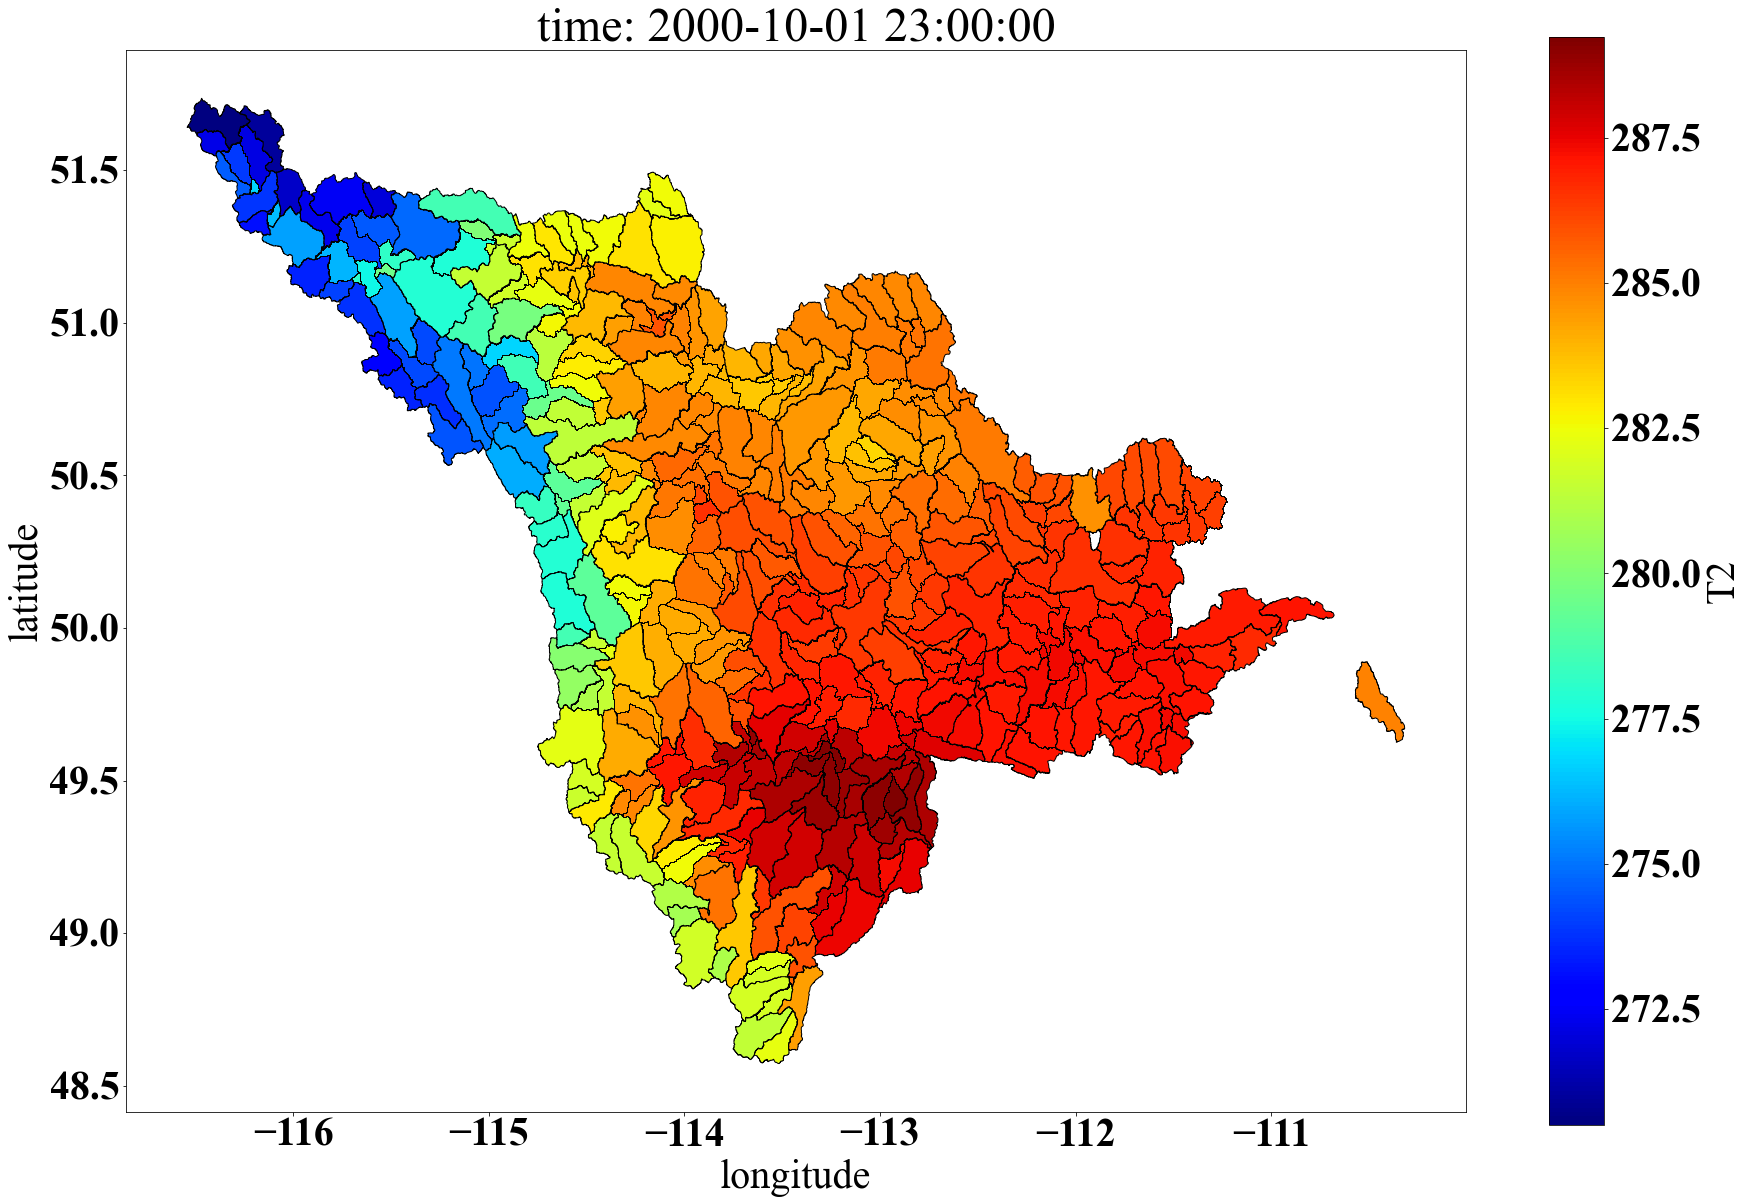

In [5]:
# loading EASYMORE
from easymore.easymore import easymore

# initializing EASYMORE object
esmr = easymore()

# set the paramaters
source_nc_name                  = '../output/WRF_Medicine_Hat_remapped_2000-10-01-00-00-00.nc'
source_nc_var_lon               = "longitude"
source_nc_var_lat               = "latitude"
source_nc_var_ID                = "ID"
source_nc_var_time              = 'time'
source_nc_var_name              = 'T2'
source_shp_name                 = '../temporary/ERA5_Medicine_Hat_target_shapefile.shp'
source_shp_field_ID             = 'ID_t'
remapped_nc_name                = None
remapped_nc_var_ID              = None
remapped_nc_var_time            = None
remapped_nc_var_name            = None
shp_target_name                 = None
shp_target_filed_ID             = None
time_step_of_viz                = '2010-01-01 00:00:00' # it should be in form of 1990-02-01 00:00:00 
location_save_fig               = '../fig/'
file_name                       = 'test2.pdf'
fig_size                        = (30,20)
show_target_shp                 = True
show_remapped_values            = True
cmap                            = 'jet'
margin                          = 0.1 #degrees
linewidth                       = 1
font_size                       = 40
font_family                     = 'Times New Roman'
font_weigth                     = 'bold'
add_colorbar                    = True
min_lon,min_lat,max_lon,max_lat = None, None, None, None #

show_remapped_values            = True

# execute EASYMORE
esmr.nc_remapper_vis(source_nc_name                  = source_nc_name,
                     source_nc_var_lon               = source_nc_var_lon,
                     source_nc_var_lat               = source_nc_var_lat,
                     source_nc_var_ID                = source_nc_var_ID,
                     source_nc_var_time              = source_nc_var_time,
                     source_nc_var_name              = source_nc_var_name,
                     source_shp_name                 = source_shp_name,
                     source_shp_field_ID             = source_shp_field_ID,
                     remapped_nc_name                = remapped_nc_name, 
                     remapped_nc_var_ID              = remapped_nc_var_ID,
                     remapped_nc_var_time            = remapped_nc_var_time,
                     remapped_nc_var_name            = remapped_nc_var_name,
                     shp_target_name                 = shp_target_name,
                     shp_target_filed_ID             = shp_target_filed_ID,
                     time_step_of_viz                = time_step_of_viz,
                     location_save_fig               = location_save_fig,
                     fig_name                        = file_name,
                     fig_size                        = fig_size,
                     show_target_shp                 = show_target_shp,
                     show_remapped_values            = show_remapped_values,
                     cmap                            = cmap,
                     margin                          = margin,
                     linewidth                       = linewidth,
                     font_size                       = font_size,
                     font_family                     = font_family,
                     font_weigth                     = font_weigth,
                     add_colorbar                    = add_colorbar,
                     min_lon                         = min_lon,
                     min_lat                         = min_lat,
                     max_lon                         = max_lon,
                     max_lat                         = max_lat)

In [11]:
import xarray as xr

ds = xr.open_dataset('../output/WRF_Medicine_Hat_remapped_2000-10-01-00-00-00.nc')

display (ds)


<xarray.Dataset>
Dimensions:    (time: 24, ID: 417)
Coordinates:
  * time       (time) datetime64[ns] 2000-10-01 ... 2000-10-01T23:00:00
  * ID         (ID) float64 1.0 2.0 3.0 4.0 5.0 ... 414.0 415.0 416.0 417.0
Data variables:
    latitude   (ID) float64 ...
    longitude  (ID) float64 ...
    T2         (time, ID) float32 ...
Attributes:
    Conventions:  CF-1.6
    Author:       The data were written by author name
    License:      
    History:      Created Wed Feb  8 13:11:04 2023
    Source:       Case: WRF_Medicine_Hat; remapped by script from library of ...

In [12]:
import geopandas as gpd

shp = gpd.read_file('../temporary/ERA5_Medicine_Hat_target_shapefile.shp')

print(shp)


      ID        lat         lon  ID_t      lat_t       lon_t  order  \
0      1  49.627953 -114.565641     1  49.635051 -114.553877      1   
1      2  49.632208 -113.932166     2  49.629115 -113.934664      2   
2      3  50.125601 -113.151587     3  50.121169 -113.149172      3   
3      4  50.200421 -112.791051     4  50.191328 -112.796039      4   
4      5  49.943092 -112.529911     5  49.941864 -112.530963      5   
..   ...        ...         ...   ...        ...         ...    ...   
412  413  49.909339 -111.281874   413  49.909391 -111.284225    413   
413  414  50.463768 -111.376871   414  50.458408 -111.369391    414   
414  415  50.382462 -111.294185   415  50.381723 -111.292947    415   
415  416  50.018842 -111.240478   416  50.020863 -111.229743    416   
416  417  49.944560 -111.088148   417  49.944044 -111.104118    417   

                                              geometry  
0    POLYGON ((-114.45500 49.52083, -114.45750 49.5...  
1    POLYGON ((-113.92500 49.5433